# movement_decompose_2d running example
Welcome! This file is an example on how to work with this library, and decompose a single 2d movement into probable submovements that compose it. \
The first step is always to import the relevant module:

In [1]:
import movement_decompose_2d

### load data

In [2]:
example_data = r'data/subject08day1pre'
position_filtered, velocity, time = movement_decompose_2d.load_data(example_data)

### Display movements

#### Movement Position

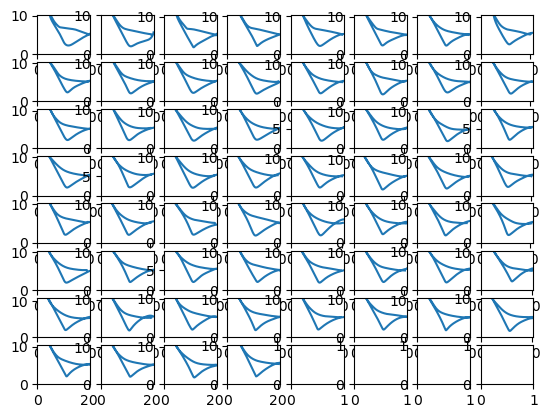

In [3]:
movement_decompose_2d.plot_position(position_filtered, time,plot_type=1) #  x vs y position

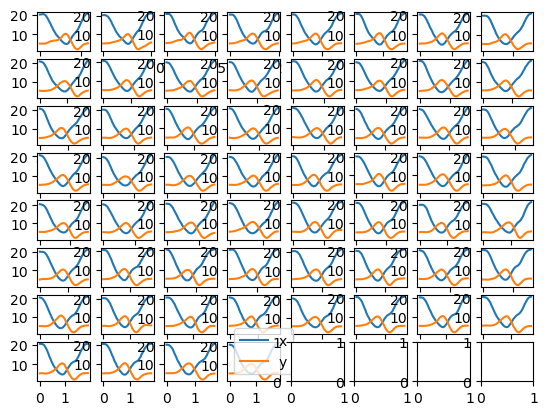

In [4]:
movement_decompose_2d.plot_position(position_filtered, time,plot_type=2) # Time vs. x & y position.

#### Movement Velocity

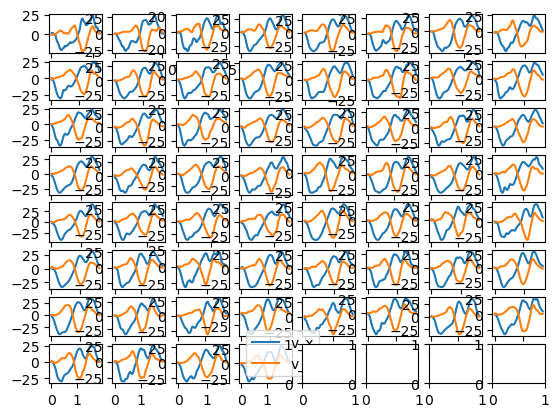

In [5]:
movement_decompose_2d.plot_velocity(velocity, time,plot_type=1) # Time vs. v_x & v_y velocity.

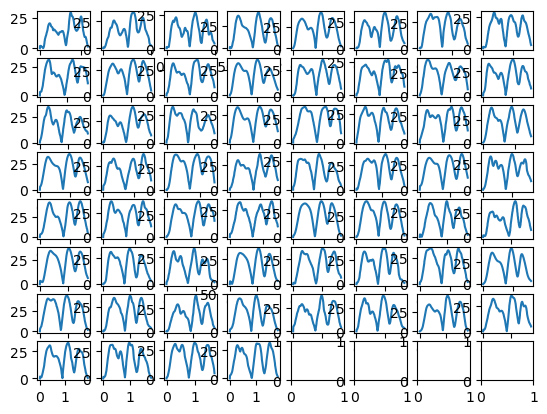

In [6]:
movement_decompose_2d.plot_velocity(velocity, time,plot_type=2) # Time vs. tangential velocity.

### Decompose to 4 submovments

In [7]:
# define parameters: , what is the & y
n_submovements = 4 # how many submovments
x_range = (-20, 20) #  minimal & maximal values of x
y_range = (-10, 10) #  minimal & maximal values of y
mov_ind = 0 # movement to decompose, by ind

# decompose the movement. Note that we use the velocity, not the position
best_error, final_parms = movement_decompose_2d.decompose_2D(time=time[mov_ind],vel=velocity[mov_ind],
                                      n_sub_movement=n_submovements,
                                      x_rng=x_range,y_rng=y_range)
print(best_error) # print the error of the found movement
print(final_parms) # print the parameters of the submovement.

c:\ProgramData\Anaconda3\envs\submovements\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


0.018697684939376503
[[ 0.07456557  0.94769167 -9.67541269  0.75472504]
 [ 1.64474721  0.64727922  7.06891159  2.19833551]
 [ 1.20898286  0.64449191  5.50303874 -7.74063473]
 [ 0.75380704  0.5737974  -3.43293947  2.46964711]]


In final_parms, each row is a different submovment, and each col is a different parameter.\
The parameters are (by column order):\
 [start_t, movment_duration, displacement_x, displacement_y].

### Plot submovements & actual velocities

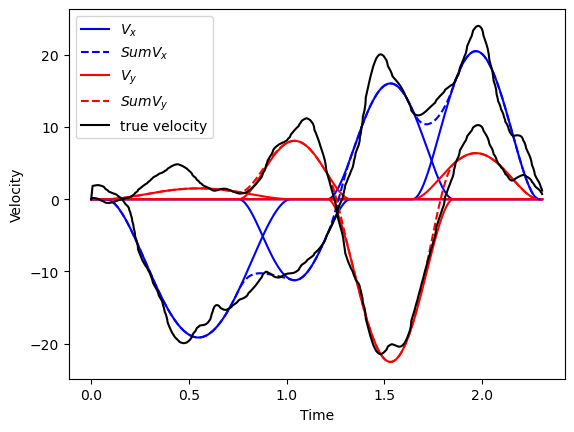

In [8]:
import matplotlib.pyplot as plt # just for adding the actual movement
axs,_ = movement_decompose_2d.plot_submovements_2D(final_parms,t=time[mov_ind])
line_true_v = axs.plot(time[mov_ind],velocity[mov_ind],'k', label='true velocity')
leg_handles = axs.get_legend().legend_handles
leg_handles.append(line_true_v[0])

axs.legend(handles = leg_handles)
plt.show()